<a href="https://colab.research.google.com/github/kelvinnjunge/knn/blob/main/spamdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementing a Naive Bayes classifier on the provided dataset.





## Importing the libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/spambase.data')
df.head(1)

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.5,0.0,0.14,0.28,0.21,0.07,0.0,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.0,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.132,0.0,0.372,0.18,0.048,5.114,101,1028,1


In [2]:
with open('/content/spambase.names') as f:
  print(f.read())

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

In [3]:
# Checking the column names
df.columns

Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278', '1'],
      dtype='object')

In [4]:
# renaming the columns name
df.rename(columns={'0':'word_freq_make','0.64':'word_freq_address','0.64.1':'word_freq_all', '0.1':'word_freq_3d',
                   '0.32':'word_freq_our','0.2':'word_freq_over','0.3':'word_freq_remove','0.4':'word_freq_internet',
                   '0.5':'word_freq_order','0.6':'word_freq_mail','0.7':'word_freq_receive','0.64.2':'word_freq_will', 
                   '0.8':'word_freq_people','0.9':'word_freq_report','0.10':'word_freq_address',
                   '0.32.1':'word_freq_free','0.11':'word_freq_business', '1.29':'word_freq_email',
                   '1.93':'word_freq_you','0.12':'word_freq_credit','0.96':'word_freq_your','0.13':'word_freq_font',
                   '0.14':'word_freq_000','0.15':'word_freq_money','0.16':'word_freq_hp','0.17':'word_freq_hpl',
                   '0.18':'word_freq_george','0.19':'word_freq_650','0.20':'word_freq_lab','0.21':'word_freq_labs',
                   '0.22':'word_freq_telnet','0.23':'word_freq_857','0.24':'word_freq_data','0.25':'word_freq_415',
                   '0.26':'word_freq_85','0.27':'word_freq_technology','0.28':'word_freq_1999','0.29':'word_freq_parts',
                   '0.30':'word_freq_pm','0.31':'word_freq_direct','0.32.2':'word_freq_cs','0.33':'word_freq_meeting',
                   '0.34':'word_freq_original','0.35':'word_freq_project', '0.36':'word_freq_re','0.37':'word_freq_edu',
                   '0.38':'word_freq_table','0.39':'word_freq_conference','0.40':'char_freq_%3B','0.41':'char_freq_%28',
                   '0.42':'char_freq_%5B','0.778':'char_freq_%21','0.43':'char_freq_%24','0.44':'char_freq_%23',
                   '3.756':'capital_run_length_average','61':'capital_run_length_longest','278':'capital_run_length_total', '1':'class'},inplace=True)

In [5]:
# checking top of the dataset
df.head(1)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_address,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.21,0.28,0.5,0.0,0.14,0.28,0.21,0.07,0.0,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.0,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.132,0.0,0.372,0.18,0.048,5.114,101,1028,1


In [6]:
# shape of the dataset
df.shape

(4600, 58)

In [7]:
# info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4600 non-null   float64
 1   word_freq_address           4600 non-null   float64
 2   word_freq_all               4600 non-null   float64
 3   word_freq_3d                4600 non-null   float64
 4   word_freq_our               4600 non-null   float64
 5   word_freq_over              4600 non-null   float64
 6   word_freq_remove            4600 non-null   float64
 7   word_freq_internet          4600 non-null   float64
 8   word_freq_order             4600 non-null   float64
 9   word_freq_mail              4600 non-null   float64
 10  word_freq_receive           4600 non-null   float64
 11  word_freq_will              4600 non-null   float64
 12  word_freq_people            4600 non-null   float64
 13  word_freq_report            4600 

In [8]:
# null values of the dataset
df.isnull().values.any()


False

In [9]:
# duplicate values
df.duplicated().sum()

391

In [10]:
# removing duplicates
df.drop_duplicates(inplace=True)

In [11]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_address,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000
mean,0.104391,0.112530,0.291390,0.063093,0.325322,0.096679,0.117503,0.108026,0.091882,0.248479,0.056700,0.565187,0.097679,0.061226,0.044813,0.253813,0.149190,0.188494,1.718318,0.084982,0.810005,0.131618,0.100646,0.090991,0.574132,0.279397,0.369926,0.128605,0.098406,0.103804,0.063559,0.044928,0.102357,0.045788,0.107907,0.099392,0.143516,0.014193,0.084077,0.061292,0.041442,0.141575,0.048784,0.085286,0.320200,0.189420,0.005788,0.034754,0.040413,0.144082,0.017380,0.281018,0.076075,0.045809,5.384282,52.137800,291.18508,0.398670
std,0.300036,0.454241,0.515752,1.352647,0.687887,0.276059,0.397327,0.410328,0.282174,0.656705,0.184186,0.882617,0.309342,0.346106,0.242214,0.797629,0.457718,0.540931,1.768967,0.505641,1.149486,1.071384,0.351375,0.431772,1.676715,0.905650,1.775532,0.535489,0.576863,0.439618,0.387312,0.300783,0.569211,0.301847,0.530323,0.386513,0.424553,0.230539,0.448043,0.319556,0.318214,0.793895,0.231898,0.646171,1.046027,0.928413,0.079180,0.298556,0.252562,0.274280,0.105743,0.843387,0.239734,0.435976,33.151287,199.605834,618.72831,0.489683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627000,7.000000,40.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

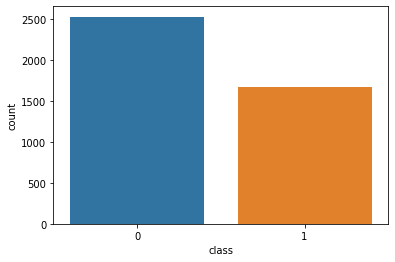

In [12]:
# Bar ggraph for class column
sns.countplot(data=df ,x=df['class']);

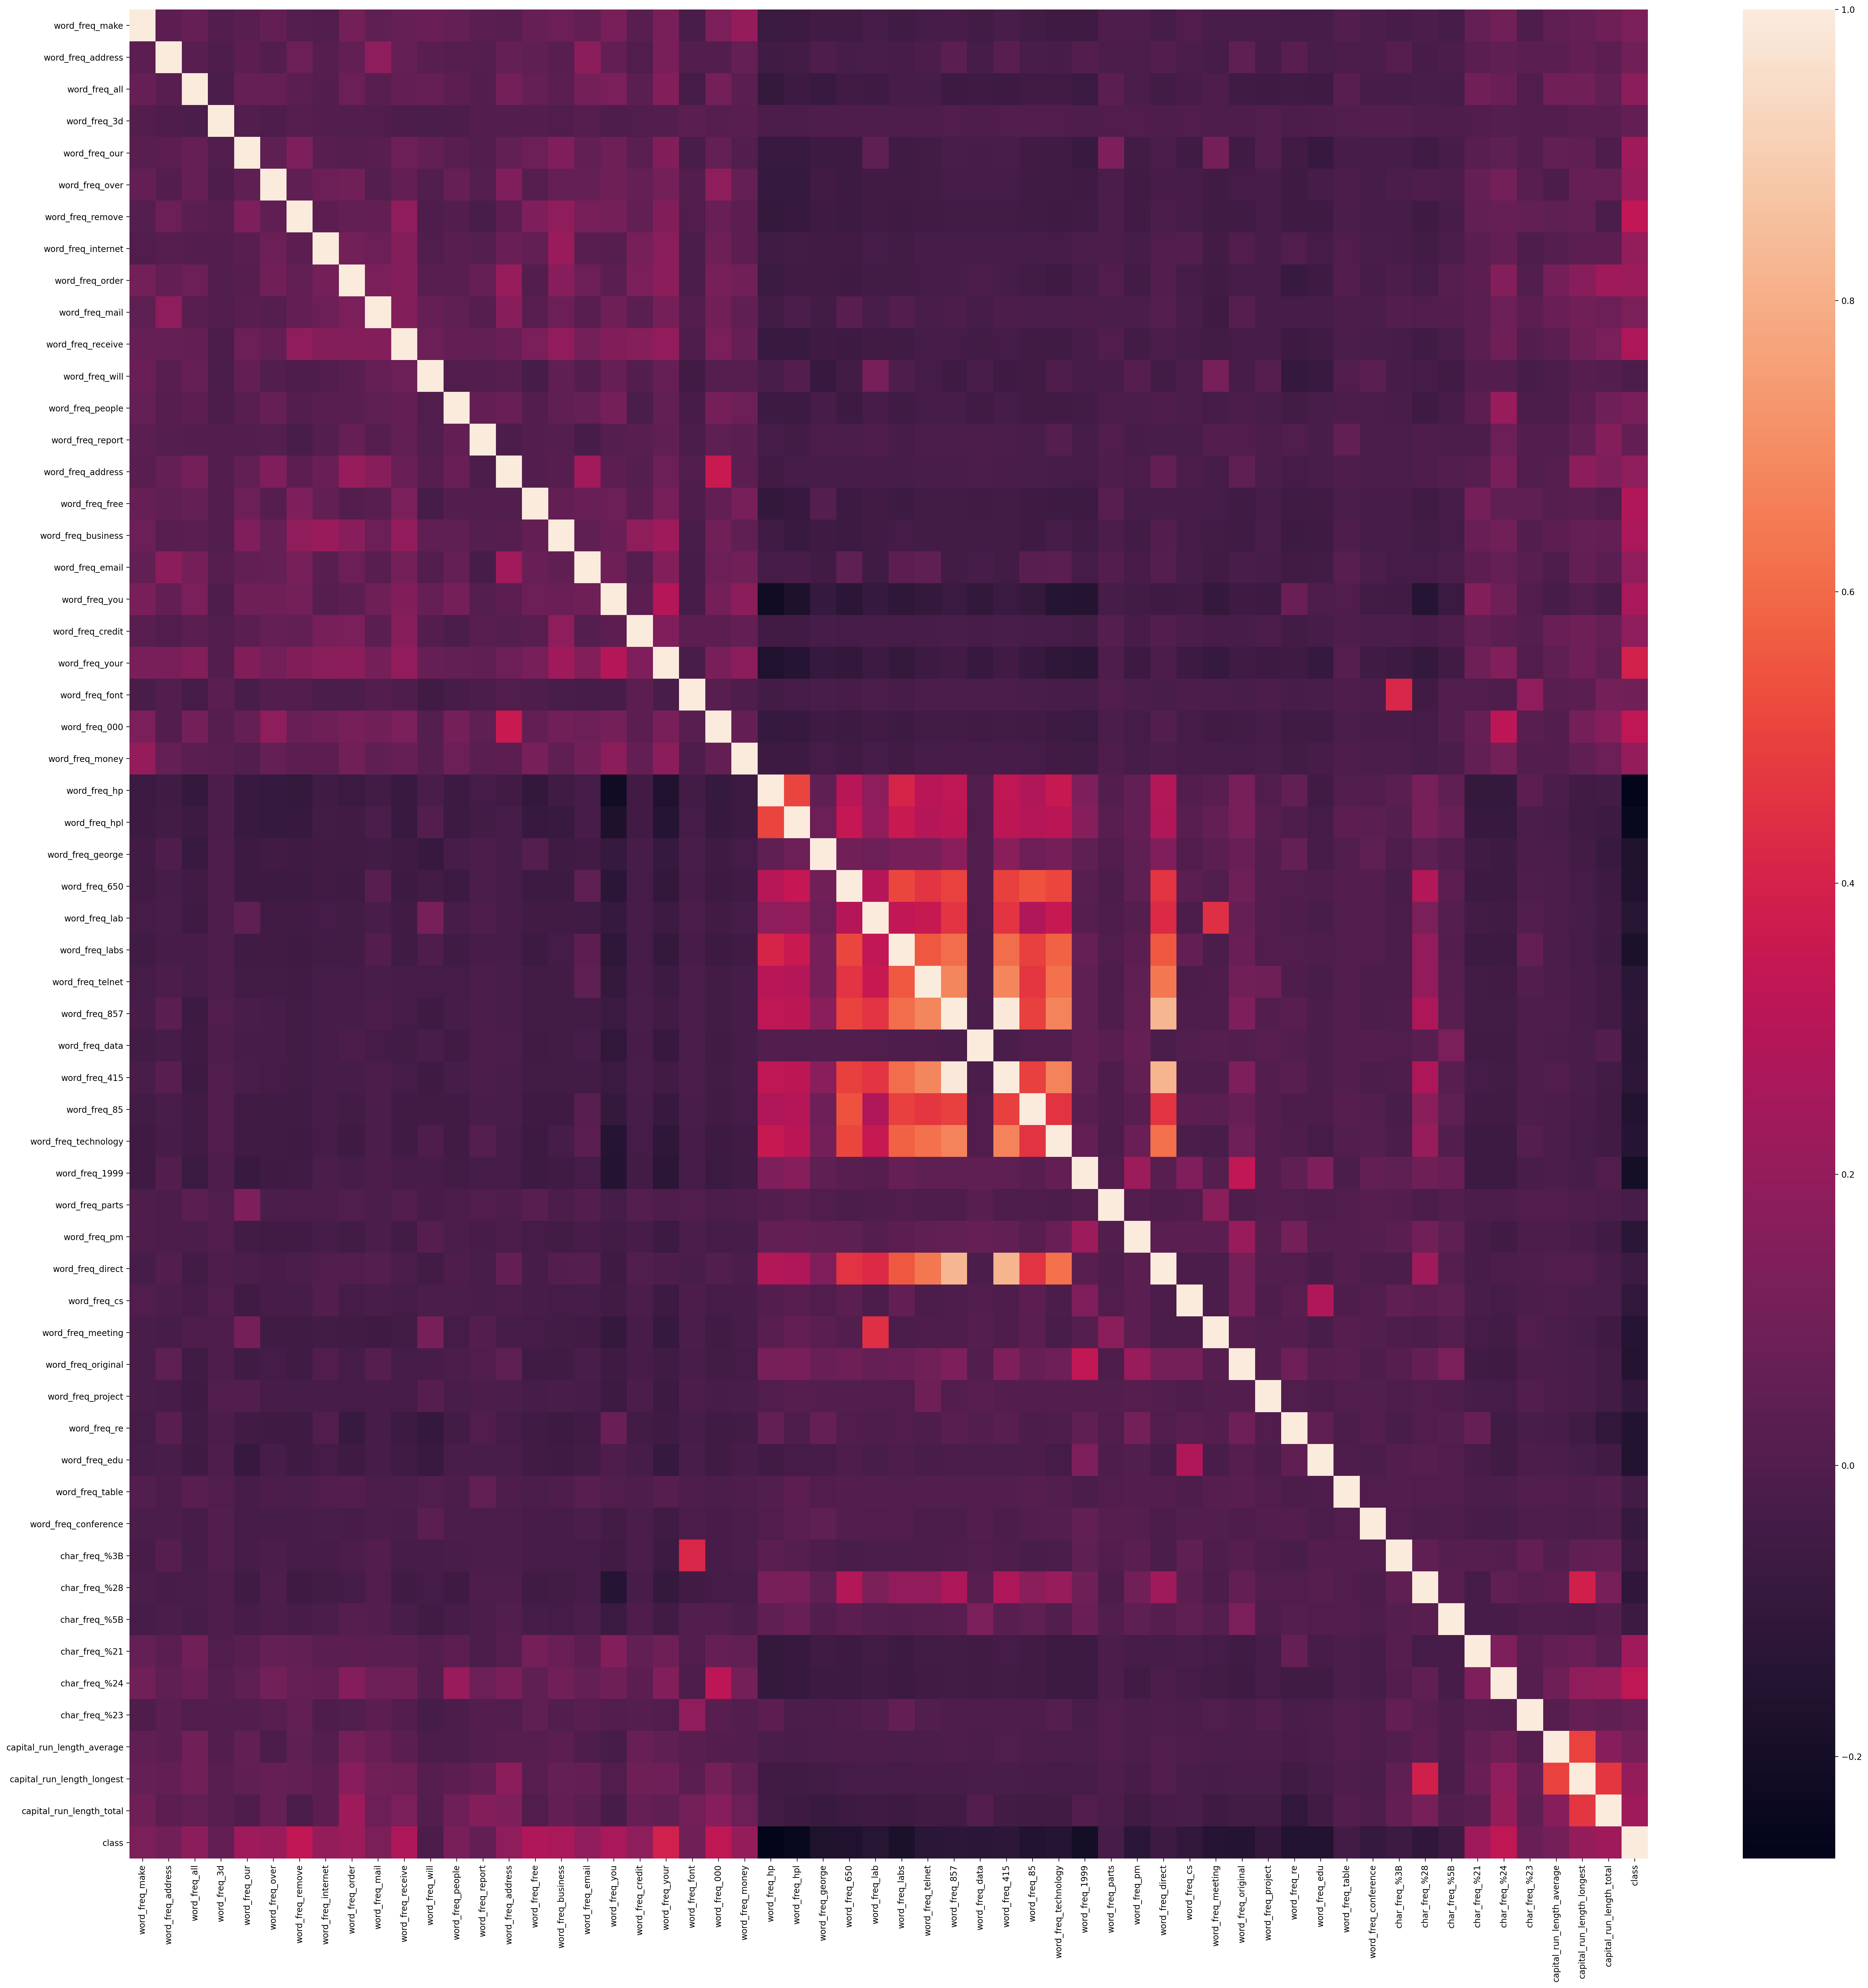

In [38]:
plt.figure(figsize=(40,40),dpi=200)
sns.heatmap(df.corr());

80-20 split

In [14]:
# importing the required libraries
from sklearn.model_selection import train_test_split

In [15]:
# preprocessing
X = df.drop('class',axis=1).values
y = df['class'].values

In [16]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [17]:
# importing gaussian model and fitting to our dataset
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()  
model = model.fit(X_train, y_train)

In [18]:
# predicting our test values
y_pred=model.predict(X_test)

In [19]:
# importing metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [20]:
# accuracy score
print('accuracy score:',accuracy_score(y_test,y_pred))

accuracy score: 0.8408551068883611


In [21]:
# confusion matrix
confusion_matrix(y_test,y_pred)

array([[381, 118],
       [ 16, 327]])

In [22]:
# classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85       499
           1       0.73      0.95      0.83       343

    accuracy                           0.84       842
   macro avg       0.85      0.86      0.84       842
weighted avg       0.87      0.84      0.84       842



We have an accuracy score of 84% . We have also classified ham emails with a precision of 96% then precision of spam is 73%. Sensitivity  of spam emails is 95% 

70-30 split

In [23]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [24]:
# importing gaussian and fitting it
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()  
model1 = model1.fit(X_train, y_train)

In [25]:
# predicting test values
y_pre = model1.predict(X_test)

In [26]:
# accuracy score
print('accuracy score:',accuracy_score(y_test,y_pre))

accuracy score: 0.8376880443388757


In [27]:
# confusion matrix
confusion_matrix(y_test,y_pre)

array([[579, 179],
       [ 26, 479]])

In [28]:
# classification report
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85       758
           1       0.73      0.95      0.82       505

    accuracy                           0.84      1263
   macro avg       0.84      0.86      0.84      1263
weighted avg       0.87      0.84      0.84      1263



We have an accuracy score of 84% . We have also classified ham emails with a precision of 96% then precision of spam is 73%. Sensitivity of spam emails is 95%

60-40 split

In [29]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [30]:
# importing the model
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()  
model2 = model2.fit(X_train, y_train)

In [31]:
# predicting y values
y_p = model2.predict(X_test)

In [32]:
# accuracy score
print('accuracy score:',accuracy_score(y_test,y_p))

accuracy score: 0.831353919239905


In [33]:
# confusion matrix
confusion_matrix(y_test,y_p)

array([[760, 251],
       [ 33, 640]])

In [34]:
# classification report
print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.96      0.75      0.84      1011
           1       0.72      0.95      0.82       673

    accuracy                           0.83      1684
   macro avg       0.84      0.85      0.83      1684
weighted avg       0.86      0.83      0.83      1684



We have an accuracy score of 84% . We have also classified ham emails with a precision of 96% then precision of spam is 73%. Sensitivity of spam emails is 95%

## Conclusion

The set of 80 - 40 split had the highest accuracy score of 84% but  with the same precision and recall metrics

No data had a class imbalance that affects model performance

